# Clasificador de imagenes de gatos y perros -Diego Ivan Perea Montealegre

Crea una carpeta laamada "dataset" y guarda el .zip en la carpeta "dataset"

[dataset](https://universe.roboflow.com/miguel-pereira-515-gmail-com/atai)

In [1]:
%cd /content/drive/MyDrive/dataset

/content/drive/MyDrive/dataset


In [3]:
!unzip /content/drive/MyDrive/dataset/dataset.zip -d .

Se truncaron las últimas líneas 5000 del resultado de transmisión.
 extracting: ./train/dogs/dog-5005_jpg.rf.5fb9d804aad5c50eea67e80e2dfcbc44.jpg  
 extracting: ./train/dogs/dog-5005_jpg.rf.937c0b3dd060222ed4c2071520e37ace.jpg  
 extracting: ./train/dogs/dog-5006_jpg.rf.1fcd5e0f6ccae104c4cda1cd3b5cd0eb.jpg  
 extracting: ./train/dogs/dog-5006_jpg.rf.327a8acd62716a7170afce14df92d9f8.jpg  
 extracting: ./train/dogs/dog-5006_jpg.rf.d7b51c2e6de6af93ffac45c4ca0666bc.jpg  
 extracting: ./train/dogs/dog-5012_jpg.rf.71bb238f971dda327c78481a3e0f97d2.jpg  
 extracting: ./train/dogs/dog-5012_jpg.rf.b8bb5fa6e88270b9ec6a19d17999cf9c.jpg  
 extracting: ./train/dogs/dog-5012_jpg.rf.c64a231ad67d6296e3c4877ce4f5d6be.jpg  
 extracting: ./train/dogs/dog-5015_jpg.rf.c56c4cb671e252819a3d3ef6ea7790ff.jpg  
 extracting: ./train/dogs/dog-5015_jpg.rf.c579da95f4467750ed742b9878b15808.jpg  
 extracting: ./train/dogs/dog-5015_jpg.rf.e8c1b20ba61ad6c7e0f3192c789f680c.jpg  
 extracting: ./train/dogs/dog-5020_jpg.rf.

In [4]:
!pwd

/content/drive/MyDrive/dataset


In [5]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense


In [6]:
train_dir = '/content/drive/MyDrive/dataset/train'
validation_dir = '/content/drive/MyDrive/dataset/test'

# Definir el tamaño de las imágenes y el número de clases (gatos y perros)
img_width, img_height = 150, 150
num_classes = 2

# Generador de datos para el conjunto de entrenamiento
train_datagen = ImageDataGenerator(rescale=1.0/255.0)
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(img_width, img_height),
    batch_size=32,
    class_mode='categorical'
)

# Generador de datos para el conjunto de validación
validation_datagen = ImageDataGenerator(rescale=1.0/255.0)
validation_generator = validation_datagen.flow_from_directory(
    validation_dir,
    target_size=(img_width, img_height),
    batch_size=32,
    class_mode='categorical'
)


Found 22725 images belonging to 2 classes.
Found 2425 images belonging to 2 classes.


In [7]:
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(img_width, img_height, 3)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))

# Compilar el modelo
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


In [9]:
epochs = 10
steps_per_epoch = len(train_generator)
validation_steps = len(validation_generator)

history=model.fit(
    train_generator,
    steps_per_epoch=steps_per_epoch,
    epochs=epochs,
    validation_data=validation_generator,
    validation_steps=validation_steps
)


Epoch 1/10
711/711 [==============================] - 116s 163ms/step - loss: 0.6272 - accuracy: 0.6431 - val_loss: 0.5867 - val_accuracy: 0.6957
Epoch 2/10
711/711 [==============================] - 104s 146ms/step - loss: 0.4717 - accuracy: 0.7725 - val_loss: 0.5507 - val_accuracy: 0.7464
Epoch 3/10
711/711 [==============================] - 102s 143ms/step - loss: 0.2729 - accuracy: 0.8842 - val_loss: 0.7655 - val_accuracy: 0.7344
Epoch 4/10
711/711 [==============================] - 100s 140ms/step - loss: 0.0958 - accuracy: 0.9651 - val_loss: 1.1896 - val_accuracy: 0.7212
Epoch 5/10
711/711 [==============================] - 101s 141ms/step - loss: 0.0379 - accuracy: 0.9870 - val_loss: 1.6333 - val_accuracy: 0.7303
Epoch 6/10
711/711 [==============================] - 99s 139ms/step - loss: 0.0269 - accuracy: 0.9905 - val_loss: 1.6492 - val_accuracy: 0.7303
Epoch 7/10
711/711 [==============================] - 99s 140ms/step - loss: 0.0248 - accuracy: 0.9919 - val_loss: 1.8865 - v

In [10]:
# Evaluar el modelo en el conjunto de validación
eval_results = model.evaluate(validation_generator, steps=validation_steps)

# Obtener la pérdida y precisión
loss = eval_results[0]
accuracy = eval_results[1]

print(f'Pérdida en el conjunto de validación: {loss:.4f}')
print(f'Precisión en el conjunto de validación: {accuracy:.4f}')


76/76 [==============================] - 8s 102ms/step - loss: 1.9704 - accuracy: 0.7278
Pérdida en el conjunto de validación: 1.9704
Precisión en el conjunto de validación: 0.7278


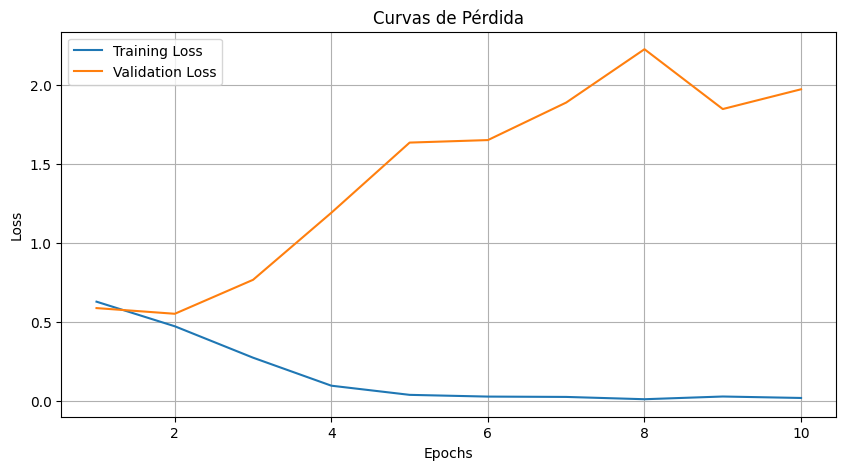

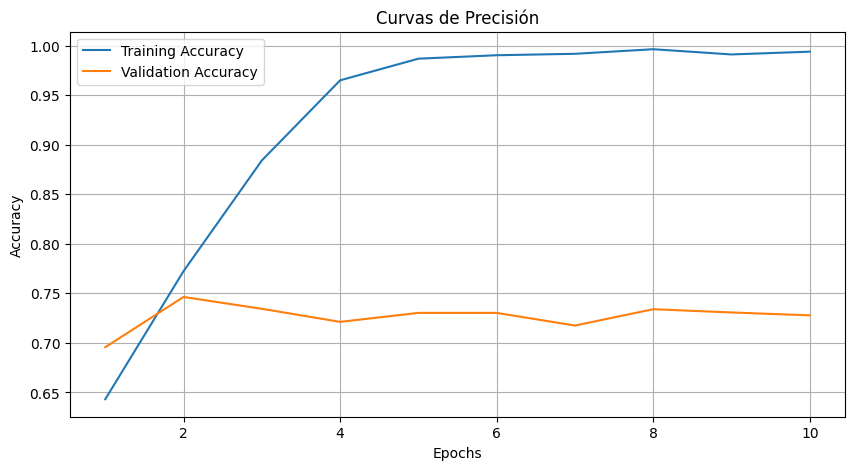

In [11]:
import matplotlib.pyplot as plt
# Obtener el historial de pérdida y precisión
train_loss = history.history['loss']
val_loss = history.history['val_loss']
train_accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

# Graficar las curvas de pérdida
plt.figure(figsize=(10, 5))
plt.plot(range(1, epochs+1), train_loss, label='Training Loss')
plt.plot(range(1, epochs+1), val_loss, label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Curvas de Pérdida')
plt.legend()
plt.grid(True)
plt.show()

# Graficar las curvas de precisión
plt.figure(figsize=(10, 5))
plt.plot(range(1, epochs+1), train_accuracy, label='Training Accuracy')
plt.plot(range(1, epochs+1), val_accuracy, label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Curvas de Precisión')
plt.legend()
plt.grid(True)
plt.show()

In [12]:
# Guardar el modelo en formato .h5
model.save('cat_dog_classifier.h5')

# Cargar el modelo guardado
model = tf.keras.models.load_model('cat_dog_classifier.h5')

# Convertir el modelo a TensorFlow Lite
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

# Guardar el modelo TensorFlow Lite en un archivo .tflite
with open('cat_dog_classifier.tflite', 'wb') as f:
    f.write(tflite_model)


In [13]:
!python --version

Python 3.10.12


In [14]:
!pip freeze > requirements.txt

1/1 [==============================] - 0s 31ms/step


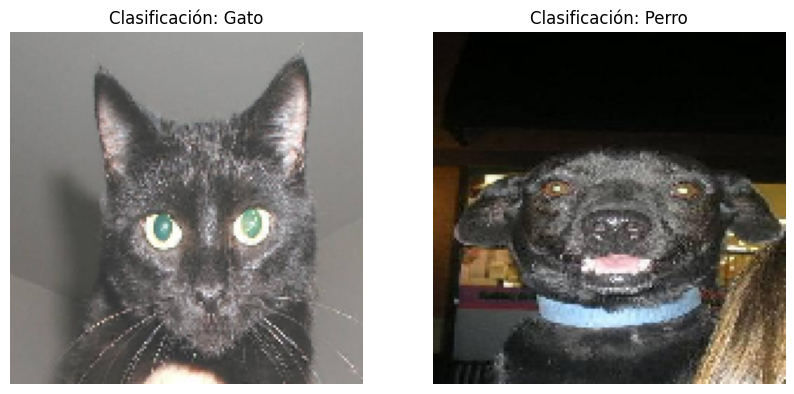

In [15]:
import os
import random
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import load_img, img_to_array

# Obtener una imagen aleatoria del conjunto de validación
validation_cats_dir = os.path.join(validation_dir, 'cats')
validation_dogs_dir = os.path.join(validation_dir, 'dogs')
random_cat_img = random.choice(os.listdir(validation_cats_dir))
random_dog_img = random.choice(os.listdir(validation_dogs_dir))

# Cargar y mostrar la imagen de gato
cat_img_path = os.path.join(validation_cats_dir, random_cat_img)
cat_img = load_img(cat_img_path, target_size=(img_width, img_height))
cat_array = img_to_array(cat_img) / 255.0
cat_array = np.expand_dims(cat_array, axis=0)

# Clasificar la imagen de gato
cat_prediction = model.predict(cat_array)
if cat_prediction[0][0] > cat_prediction[0][1]:
    cat_label = 'Gato'
else:
    cat_label = 'Perro'

# Cargar y mostrar la imagen de perro
dog_img_path = os.path.join(validation_dogs_dir, random_dog_img)
dog_img = load_img(dog_img_path, target_size=(img_width, img_height))
dog_array = img_to_array(dog_img) / 255.0
dog_array = np.expand_dims(dog_array, axis=0)

# Clasificar la imagen de perro
dog_prediction = model.predict(dog_array)
if dog_prediction[0][0] > dog_prediction[0][1]:
    dog_label = 'Gato'
else:
    dog_label = 'Perro'

# Mostrar las imágenes y la clasificación
fig, axs = plt.subplots(1, 2, figsize=(10, 5))
axs[0].imshow(cat_img)
axs[0].set_title(f'Clasificación: {cat_label}')
axs[0].axis('off')

axs[1].imshow(dog_img)
axs[1].set_title(f'Clasificación: {dog_label}')
axs[1].axis('off')

plt.show()


In [16]:
!pip freeze > requirements_with_validation.txt